In [1]:
#引入需要的python包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

data = pd.read_csv("/Users/yangyi/Desktop/plan/python-data/地市级党委书记数据库（2000-10）.csv",encoding = 'gbk')
print(data.head())

   省级政区代码 省级政区名称  地市级政区代码 地市级政区名称    年份 党委书记姓名  出生年份  出生月份  籍贯省份代码 籍贯省份名称  \
0  130000    河北省   130100    石家庄市  2000    陈来立   NaN   NaN     NaN    NaN   
1  130000    河北省   130100    石家庄市  2001    吴振华   NaN   NaN     NaN    NaN   
2  130000    河北省   130100    石家庄市  2002    吴振华   NaN   NaN     NaN    NaN   
3  130000    河北省   130100    石家庄市  2003    吴振华   NaN   NaN     NaN    NaN   
4  130000    河北省   130100    石家庄市  2004    吴振华   NaN   NaN     NaN    NaN   

   ...    民族  教育 是否是党校教育（是=1，否=0） 专业：人文 专业：社科  专业：理工  专业：农科  专业：医科  入党年份  工作年份  
0  ...   NaN  硕士              1.0   NaN   NaN    NaN    NaN    NaN   NaN   NaN  
1  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
2  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
3  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
4  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  

[5 rows x 23 columns]


In [3]:
field = data.columns.tolist()
print(field)
print('----------')
print(data.describe(include=[np.number]).head())

#count代表总的数值
#unique代表唯一值
#top出现次数最多
#frep是代表平均值

['省级政区代码', '省级政区名称', '地市级政区代码', '地市级政区名称', '年份', '党委书记姓名', '出生年份', '出生月份', '籍贯省份代码', '籍贯省份名称', '籍贯地市代码', '籍贯地市名称', '性别', '民族', '教育', '是否是党校教育（是=1，否=0）', '专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科', '入党年份', '工作年份']
----------
              省级政区代码        地市级政区代码           年份         出生年份         出生月份  \
count    3663.000000    3663.000000  3663.000000  2676.000000  2645.000000   
mean   403393.393393  404456.756757  2005.000000  1953.622571     6.790548   
std    148176.721620  148485.810327     3.162709     4.416316     3.614664   
min    130000.000000  130100.000000  2000.000000  1941.000000     1.000000   
25%    330000.000000  330100.000000  2002.000000  1951.000000     3.000000   

              籍贯省份代码         籍贯地市代码  是否是党校教育（是=1，否=0）        专业：人文  \
count    2624.000000    2615.000000       2493.000000  2370.000000   
mean   364428.353659  365742.332696          0.430405     0.275527   
std    126267.485520  125961.993399          0.576136     0.446874   
min    110000.000000  1200

In [4]:
"""
part1：性别问题
"""

'\npart1：性别问题\n'

In [5]:
data_gender = data['性别']
data_gender_re = data_gender[data_gender.notnull()]  #缺失值索引判断
print(data_gender_re.describe())
print('---------------------------')
print(len(data_gender))
print('---------------------------')
#print(data_gender_re)
print(data_gender.head())
#NaN代表缺失值
print('---------------------------')
count = len(data_gender_re)
count_m = len(data_gender_re[data_gender_re == '男'])
count_w = len(data_gender_re[data_gender_re == '女'])  
rate_m = count_m/count
rate_w = count_w/count
print('样本量：' + str(count) + '\n',
      '男性样本量：' + str(count_m) + '\n',
      '女性样本量：' + str(count_w) + '\n',
      '男性比例：' + str(rate_m * 100)[:4] + '%' + '\n',
      '女性比例：' + str(rate_w * 100)[:4] + '%' + '\n',
     )



count     2708
unique       2
top          男
freq      2633
Name: 性别, dtype: object
---------------------------
3663
---------------------------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: 性别, dtype: object
---------------------------
样本量：2708
 男性样本量：2633
 女性样本量：75
 男性比例：97.2%
 女性比例：2.76%



In [6]:
#按省份分析市委书记女性比例

data_gender2 = data[['省级政区名称','性别']]
data_gender2_re = data_gender2[data_gender2['性别'].notnull()]
pt = pd.crosstab(data_gender2_re['省级政区名称'],data_gender2_re['性别'])
pt['女性占比'] = pt['女'] / (pt['男'] + pt['女'])
pt2 = pt.sort_values(by= ['女性占比'] , ascending=False)
print(pt2)

性别         女    男      女性占比
省级政区名称                     
辽宁省       13  121  0.097015
陕西省        9   93  0.088235
吉林省        4   72  0.052632
山西省        6  112  0.050847
四川省        8  155  0.049080
安徽省        7  167  0.040230
江西省        4  113  0.034188
山东省        6  178  0.032609
福建省        3   96  0.030303
云南省        2   73  0.026667
浙江省        3  114  0.025641
广东省        5  212  0.023041
江苏省        3  129  0.022727
湖南省        1  126  0.007874
河南省        1  182  0.005464
新疆维吾尔自治区   0   21  0.000000
内蒙古自治区     0   86  0.000000
海南省        0   22  0.000000
湖北省        0  123  0.000000
甘肃省        0  109  0.000000
广西壮族自治区    0  122  0.000000
贵州省        0   36  0.000000
宁夏回族自治区    0   49  0.000000
青海省        0   11  0.000000
黑龙江省       0  111  0.000000


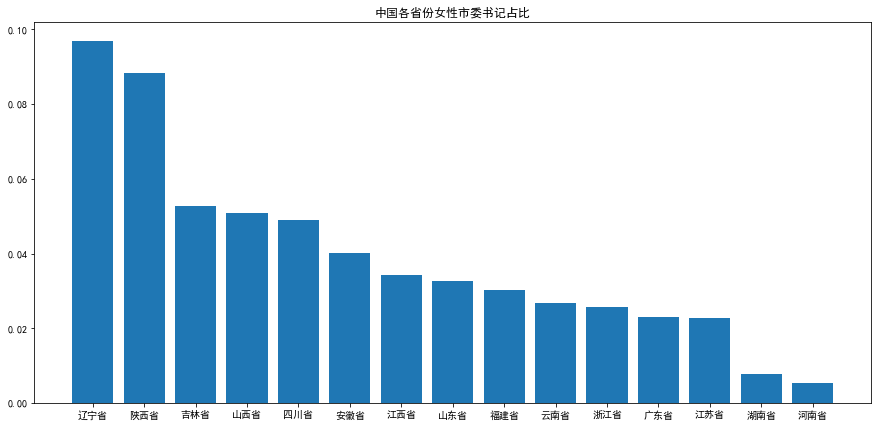

In [11]:
fig_q1_1 = plt.figure(figsize= (15 ,7))

index = pt2.index[:15]
plt.bar(range(15),pt2['女性占比'][:15], tick_label = index)
plt.title('中国各省份女性市委书记占比')
plt.show()